In [1]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [2]:
## 1) This part is to use scikit-learn SelectKBest package to selecte the features that influence the target most
##using default f_classif method

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest


df_trans = pd.read_csv('train_transaction.csv',index_col='TransactionID')
df_id = pd.read_csv('train_identity.csv',index_col='TransactionID')

In [3]:
def id_split(dataframe):
    
    #expand = split and expand to seperate column
    dataframe['device_name'] = dataframe['DeviceInfo'].str.split('/', expand=True)[0]
    dataframe['device_version'] = dataframe['DeviceInfo'].str.split('/', expand=True)[1]

    dataframe['OS_id_30'] = dataframe['id_30'].str.split(' ', expand=True)[0]
    dataframe['version_id_30'] = dataframe['id_30'].str.split(' ', expand=True)[1]

    dataframe['browser_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[0]
    dataframe['version_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[1]

    dataframe['screen_width'] = dataframe['id_33'].str.split('x', expand=True)[0]
    dataframe['screen_height'] = dataframe['id_33'].str.split('x', expand=True)[1]

    dataframe['id_34'] = dataframe['id_34'].str.split(':', expand=True)[1]
    dataframe['id_23'] = dataframe['id_23'].str.split(':', expand=True)[1]
    
    #very specifically group device brands to help making decision
    dataframe.loc[dataframe['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    dataframe.loc[dataframe['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    dataframe.loc[dataframe['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    dataframe.loc[dataframe['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    dataframe.loc[dataframe['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    dataframe.loc[dataframe['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'

    #make the device name that are less than 200 to be other
    dataframe.loc[dataframe.device_name.isin(dataframe.device_name.value_counts()[dataframe.device_name.value_counts() < 200].index), 'device_name'] = "Others"
    
    #new column to record that this device has id???
    dataframe['had_id'] = 1
    
    return dataframe

In [4]:
df_id = id_split(df_id)

In [5]:
#merge data
df_train = df_trans.merge(df_id, how='left', left_index=True,  on='TransactionID')


In [6]:


#C sum feature
df_train["C_sum"] = df_train.loc[:,'C1':'C14'].sum(axis = 1).astype(np.int8)

    
##isnull feature: some features have missing values all together so one will be put here.
#M1, M4, id_14,id_01, id_07, 

##M1,m4

df_train['M1_null'] = df_train.loc[:,'M1'].isna().astype(np.int8)
df_train['M4_null'] = df_train.loc[:,'M4'].isna().astype(np.int8)


df_train['id14_null'] = df_train.loc[:,'id_14'].isna().astype(np.int8)
df_train['id01_null'] = df_train.loc[:,'id_01'].isna().astype(np.int8)
df_train['id07_null'] = df_train.loc[:,'id_07'].isna().astype(np.int8)
df_train['d12_null'] = df_train.loc[:,'D12'].isna().astype(np.int8)
df_train['devicename_null'] = df_train.loc[:,'device_name'].isna().astype(np.int8)


##ids 
df_train['id_null'] = df_id.loc[:,"id_01":"id_38"].isna().sum(axis=1).astype(np.int8)


##bin C1-C14 by using 

In [7]:

#add total na for train and test data. 
df_train['tot_na'] = df_train.isna().sum(axis=1).astype(np.int8) 

print(df_train.head())


# y_train = df_train['isFraud'].copy()
del df_trans, df_id



#https://www.kaggle.com/davidcairuz/feature-engineering-lightgbm#
#removed V300 feature
useful_features = ['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
                   'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
                   'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M2', 'M3',
                   'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V17',
                   'V19', 'V20', 'V29', 'V30', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V40', 'V44', 'V45', 'V46', 'V47', 'V48',
                   'V49', 'V51', 'V52', 'V53', 'V54', 'V56', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V69', 'V70', 'V71',
                   'V72', 'V73', 'V74', 'V75', 'V76', 'V78', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V87', 'V90', 'V91', 'V92',
                   'V93', 'V94', 'V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128', 'V130', 'V131', 'V138', 'V139', 'V140',
                   'V143', 'V145', 'V146', 'V147', 'V149', 'V150', 'V151', 'V152', 'V154', 'V156', 'V158', 'V159', 'V160', 'V161',
                   'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V169', 'V170', 'V171', 'V172', 'V173', 'V175', 'V176', 'V177',
                   'V178', 'V180', 'V182', 'V184', 'V187', 'V188', 'V189', 'V195', 'V197', 'V200', 'V201', 'V202', 'V203', 'V204',
                   'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V219', 'V220',
                   'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V231', 'V233', 'V234', 'V238', 'V239',
                   'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V249', 'V251', 'V253', 'V256', 'V257', 'V258', 'V259', 'V261',
                   'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276',
                   'V277', 'V278', 'V279', 'V280', 'V282', 'V283', 'V285', 'V287', 'V288', 'V289', 'V291', 'V292', 'V294','id_01', 'id_02', 'id_03', 'id_05', 'id_06', 'id_09',
                   'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_17', 'id_19', 'id_20', 'id_30', 'id_31', 'id_32', 'id_33',
                   'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'device_name', 'device_version', 'OS_id_30', 'version_id_30',
                   'browser_id_31', 'version_id_31', 'screen_width', 'screen_height', 'had_id','tot_na','id_null','M1_null','M4_null','id01_null','id07_null','id14_null','d12_null','devicename_null']
print(len(useful_features))





               isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400            68.5         W  13926    NaN   
2987001              0          86401            29.0         W   2755  404.0   
2987002              0          86469            59.0         W   4663  490.0   
2987003              0          86499            50.0         W  18132  567.0   
2987004              0          86506            50.0         H   4497  514.0   

               card3       card4  card5   card6  ...  C_sum  M1_null  M4_null  \
TransactionID                                    ...                            
2987000        150.0    discover  142.0  credit  ...      8        0        0   
2987001        150.0  mastercard  102.0  credit  ...      6        1        0   
2987002        150.0        visa  166.0   debit  ...      7        0        0   
2987003        150.0  maste

In [8]:
cols_to_drop = [col for col in df_train.columns if col not in useful_features]
cols_to_drop.remove('isFraud')
cols_to_drop.remove('TransactionDT')

df_train = df_train.drop(cols_to_drop, axis=1)


In [9]:
##don't do any feature interactions yet


# New feature - log of transaction amount.
df_train['TransactionAmt_Log'] = np.log(df_train['TransactionAmt'])

# New feature - decimal part of the transaction amount.
df_train['TransactionAmt_decimal'] = ((df_train['TransactionAmt'] - df_train['TransactionAmt'].astype(int)) * 1000).astype(int)

# New feature - day of week in which a transaction happened.
df_train['Transaction_day_of_week'] = np.floor((df_train['TransactionDT'] / (3600 * 24) - 1) % 7)

# New feature - hour of the day in which a transaction happened.
df_train['Transaction_hour'] = np.floor(df_train['TransactionDT'] / 3600) % 24

# Encoding - count encoding for both df_train and df_test
for feature in ['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'id_36']:
    df_train[feature + '_count_full'] = df_train[feature].map(df_train[feature].value_counts(dropna=False))

    # Encoding - count encoding separately for df_train and df_test
for feature in ['id_01', 'id_31', 'id_33', 'id_36']:
    df_train[feature + '_count_dist'] = df_train[feature].map(df_train[feature].value_counts(dropna=False))
    
#target encoding
for col in ['addr1','tot_na','id_null','Transaction_hour']:
    temp_dict = df_train.groupby([col])['isFraud'].agg(['mean']).reset_index().rename(
                                                        columns={'mean': col+'_target_mean'})
    temp_dict.index = temp_dict[col].values
    temp_dict = temp_dict[col+'_target_mean'].to_dict()

    df_train[col+'_target_mean'] = df_train[col].map(temp_dict)


In [10]:
# https://www.kaggle.com/c/ieee-fraud-detection/discussion/100499
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 
          'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft',
          'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo',
          'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 
          'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink',
          'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other',
          'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 
          'protonmail.com': 'other', 'hotmail.fr': 'microsoft', 'windstream.net': 'other', 
          'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo',
          'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other',
          'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft',
          'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink', 
          'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 
          'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 
          'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 
          'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 'cableone.net': 'other', 
          'hotmail.es': 'microsoft', 'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 
          'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other',
          'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}

us_emails = ['gmail', 'net', 'edu']

for c in ['P_emaildomain', 'R_emaildomain']:
    df_train[c + '_bin'] = df_train[c].map(emails)
    
    df_train[c + '_suffix'] = df_train[c].map(lambda x: str(x).split('.')[-1])
    
    df_train[c + '_suffix'] = df_train[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')



In [11]:

#label encoding the rest 
from sklearn import preprocessing

for col in df_train.columns:
    if df_train[col].dtype == 'object':
        le = preprocessing.LabelEncoder()
        le.fit(list(df_train[col].astype(str).values))
        df_train[col] = le.transform(list(df_train[col].astype(str).values))


In [12]:
X_train = df_train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
y_train = df_train.sort_values('TransactionDT')['isFraud']

In [13]:
##do final step 

##Deal with missing data
X_train = X_train.fillna(-999)


In [18]:
#apply SelectKBest class to extract top 50 best features
bestfeatures = SelectKBest( k=50)

fit = bestfeatures.fit(X_train,y_train)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features
usefulfeat = featureScores.nlargest(100,'Score')
usefulfeat.to_csv("usefulfeat.csv",index=False)

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


                    Specs         Score
298               isFraud           inf
291    tot_na_target_mean  3.145634e+04
9                   addr2  1.544614e+04
290     addr1_target_mean  1.541085e+04
271              d12_null  1.499112e+04
1               ProductCD  1.483769e+04
8                   addr1  1.437862e+04
36                    D12  1.435500e+04
281      card3_count_full  1.400202e+04
38                    D14  1.344098e+04
297  R_emaildomain_suffix  1.300060e+04
254                 id_38  1.270489e+04
239                 id_09  1.252972e+04
33                     D9  1.252489e+04
244                 id_15  1.245602e+04
286      id_01_count_dist  1.200402e+04
236                 id_03  1.178074e+04
252                 id_36  1.150424e+04
247                 id_20  1.147822e+04
31                     D6  1.146125e+04


[3.90137100e+04 4.96201903e+03 1.73459598e+03 2.53694030e+04
 9.54836301e+03 0.00000000e+00 2.97907498e+03 4.09508470e+04
 7.21666801e+03 7.40175000e+03 3.18424011e+02 2.66349301e+03
 2.91406499e+03 2.57679741e+05 8.74129599e+03 1.85564018e+04
 2.25276198e+03 1.15788920e+04 1.02757002e+04 8.74587270e+04
 6.46877498e+03 1.60517180e+04 3.26158751e+04 2.57186784e+04
 8.75619649e+04 2.31170181e+05 4.97357298e+03 5.00401680e+04
 7.71219098e+03 2.51946399e+03 0.00000000e+00 3.31996001e+03
 3.72214597e+03 0.00000000e+00 3.38652803e+03 2.27617200e+03
 0.00000000e+00 3.80384003e+02 0.00000000e+00 2.18850310e+04
 0.00000000e+00 3.06882100e+03 3.35327648e+04 1.70596849e+04
 6.08376999e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.36881004e+02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.43257004e+02
 0.00000000e+00 3.76834000e+03 2.02828995e+02 0.00000000e+00
 3.65071991e+02 0.00000000e+00 2.71165009e+02 2.15188599e+03
 0.00000000e+00 0.000000

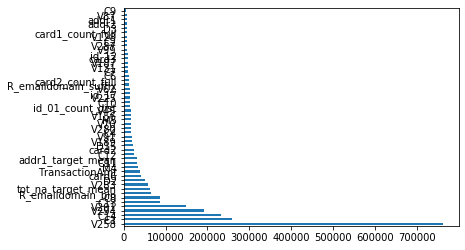

In [19]:
## 2) use xgb to plot feature importance
from lightgbm import LGBMClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
model = LGBMClassifier(n_estimator = 500, learning_rate = 0.01, importance_type = 'gain')
X_train.drop('isFraud',axis=1, inplace = True)
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

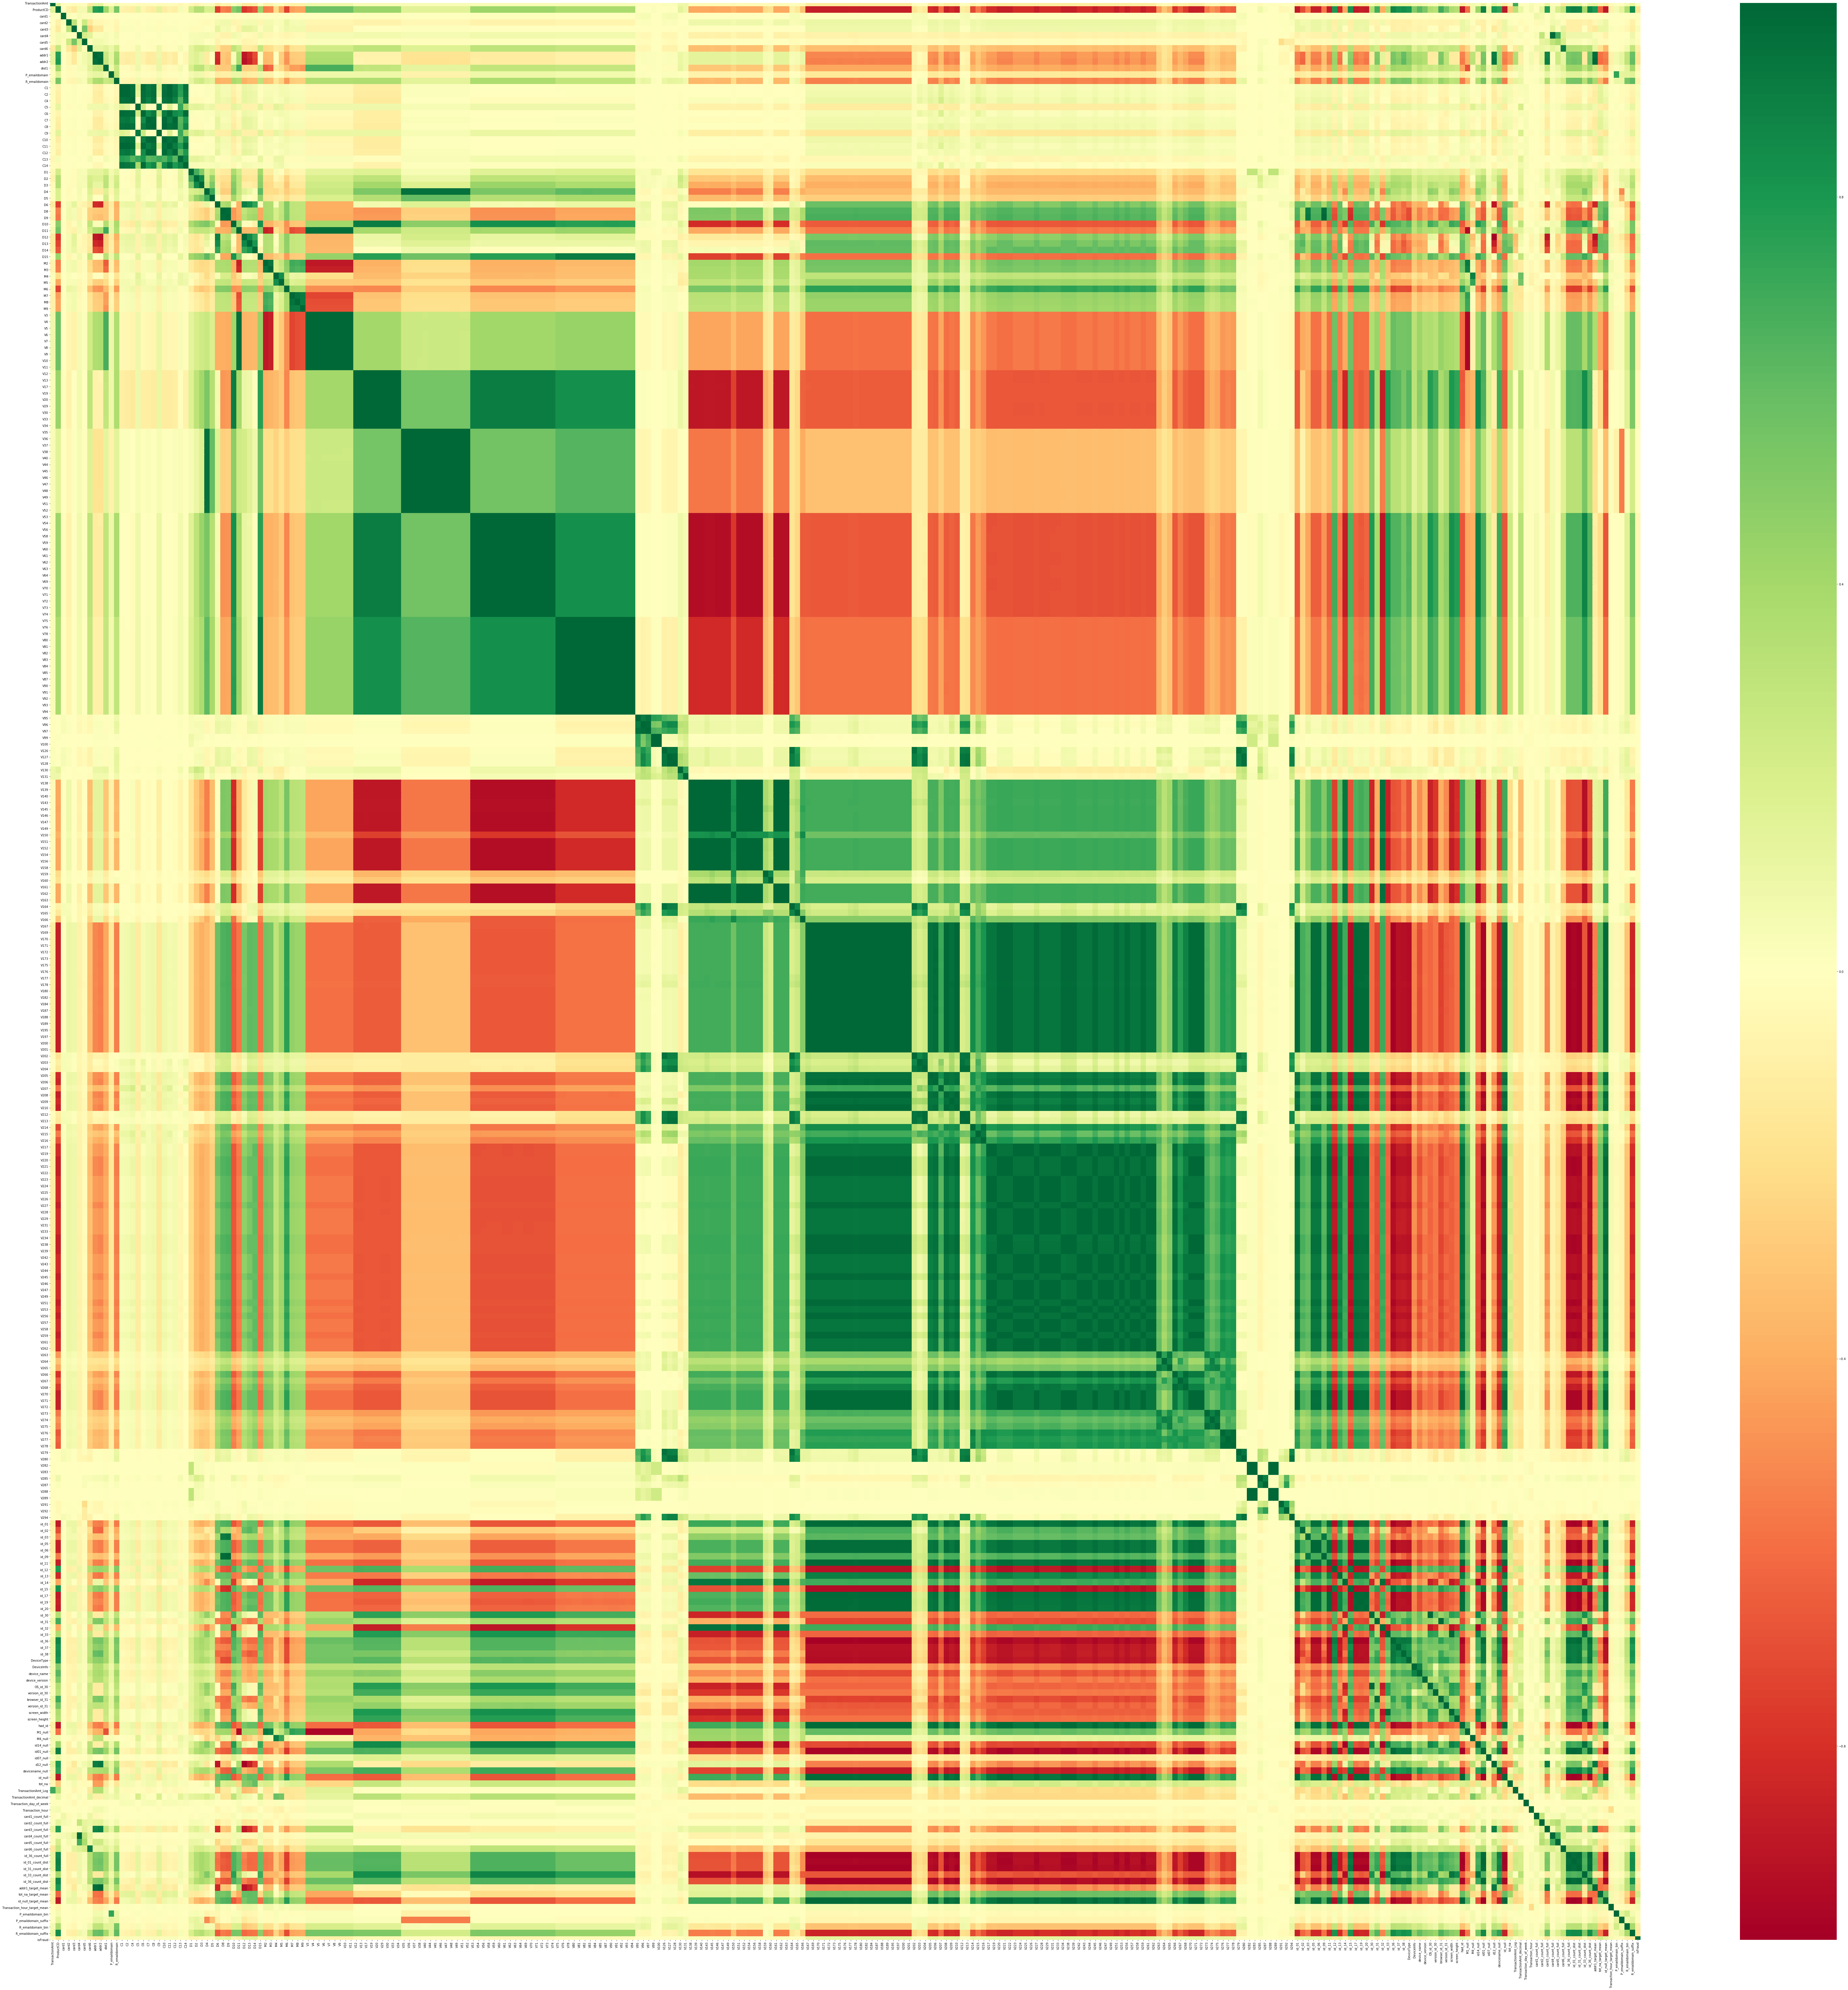

In [20]:
## 3)Correlation Matrix with Heatmap
import seaborn as sns
#get correlations of each features in dataset
X_train['isFraud'] = y_train

corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(120,120))
#plot heat map
g=sns.heatmap(X_train[top_corr_features].corr(),annot=False,cmap="RdYlGn")

##double click the picture to see the zoomed-in 